In [1]:
# ドライブ読み込み
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks"

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [2]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=3bd14b9840de014aea6ccd93e500c47ebb1f0eeb14e85048f22d93f49b66f6f9
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import sympy
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from PIL import Image

# (1)データの分離と正解率、SVCでの学習

In [22]:
# --------------------(1)-----------------------
from sklearn.datasets import load_digits
# 読み込み
digits = load_digits()
# X...64ピクセルに対応する値、y...何の数字であるか
X = digits.data
y = digits.target
# 学習データ(75%)とテストデータ(25%)へ分離
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

from sklearn.svm import SVC
# rbfカーネルを持つSVCモデル
model = SVC(kernel="rbf", gamma=0.001)
# 学習
model.fit(X_train, y_train)

# 正解率
y_pred = model.predict(X_test)
seikairitsu = accuracy_score(y_test, y_pred)
print(f"テストデータの正解率は {seikairitsu*100} ％")

テストデータの正解率は 99.55555555555556 ％


# (2)画像数値化の流れ

<PIL.Image.Image image mode=L size=200x200 at 0x78541CD2D660>


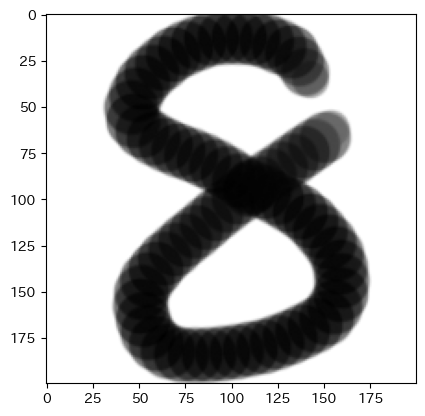

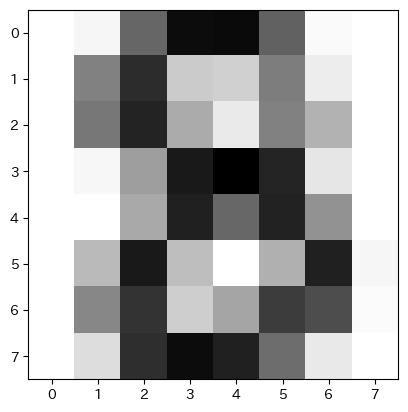

[[255. 246. 112.  29.  27. 108. 250. 255.]
 [255. 137.  59. 206. 211. 134. 238. 255.]
 [255. 128.  50. 176. 235. 137. 183. 255.]
 [255. 247. 164.  41.  17.  52. 231. 255.]
 [255. 255. 175.  48. 113.  49. 153. 255.]
 [255. 190.  41. 194. 255. 181.  48. 246.]
 [255. 143.  65. 209. 171.  73.  89. 251.]
 [255. 223.  60.  29.  47. 119. 234. 255.]]

[[ 0.  0.  9. 15. 15.  9.  0.  0.]
 [ 0.  7. 13.  3.  2.  8.  1.  0.]
 [ 0.  8. 13.  5.  1.  7.  4.  0.]
 [ 0.  0.  6. 14. 15. 13.  1.  0.]
 [ 0.  0.  5. 13.  9. 13.  6.  0.]
 [ 0.  4. 14.  4.  0.  4. 13.  0.]
 [ 0.  7. 12.  3.  5. 12. 11.  0.]
 [ 0.  2. 13. 15. 13.  9.  1.  0.]]

[ 0.  0.  9. 15. 15.  9.  0.  0.  0.  7. 13.  3.  2.  8.  1.  0.  0.  8.
 13.  5.  1.  7.  4.  0.  0.  0.  6. 14. 15. 13.  1.  0.  0.  0.  5. 13.
  9. 13.  6.  0.  0.  4. 14.  4.  0.  4. 13.  0.  0.  7. 12.  3.  5. 12.
 11.  0.  0.  2. 13. 15. 13.  9.  1.  0.]


In [23]:
# --------------------(2)-----------------------
from PIL import Image

# ① 画像ファイルを読み込み、② 8bitグレースケールモードに変換する。
img_c1 = Image.open("X.png").convert("L")
print(img_c1)
plt.imshow(img_c1, cmap="gray")
plt.show()

# ② 大きさを 8×8 にする。
img_c2 = img_c1.resize((8,8))
plt.imshow(img_c2, cmap="gray")
plt.show()

# ③ 画像オブジェクトを NumPy 配列に変換する。
img_arr1 = np.asarray(img_c2, dtype=float)
print(img_arr1)
print()

# ④ 256階調の値を白黒逆転させ 16 階調にする。
img_arr2 = 16 - np.floor(17 * img_arr1/256)
print(img_arr2)
print()

# ⑤ NumPy配列の形状をフラットに変更する。
img_arr3 = img_arr2.flatten()
print(img_arr3)

# (3)画像の予想

In [24]:
# --------------------(3)-----------------------
# 二次元配列に変換
X_num = np.reshape(img_arr3, (1, len(img_arr3)))
# 予測
X_png_pred = model.predict(X_num)
# 予測した値を表示
print(f'このモデルはX.pngのことを{X_png_pred}と予測しました。')

このモデルはX.pngのことを[8]と予測しました。
